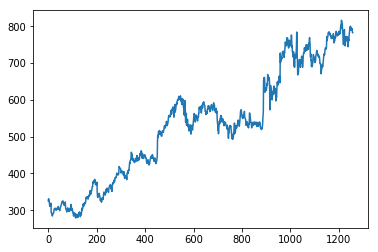

This is x_train
[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.86081554]
  [0.85860183]
  [0.85556961]
  ...
  [0.93876032]
  [0.93403527]
  [0.93483518]]

 [[0.85860183]
  [0.85556961]
  [0.85415582]
  ...
  [0.93403527]
  [0.93483518]
  [0.9313937 ]]

 [[0.85556961]
  [0.85415582]
  [0.87045167]
  ...
  [0.93483518]
  [0.9313937 ]
  [0.94636878]]]
This is y_train
[0.08627874 0.08471612 0.07454052 ... 0.9313937  0.94636878 0.96569685]
Epoch 1/5
1148/1148 [==============================] - 18s 16ms/step - loss: 0.0353
Epoch 2/5
1148/1148 [==============================] - 4s 4ms/step - loss: 0.0125
Epoch 3/5
1148/1148 [==============================] - 4s 4ms/step - loss: 0.0105
Epoch 4/5
1148/1148 [==============================] -

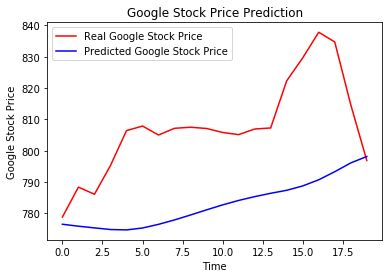

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
plt.plot(training_set)
plt.show()


sc = MinMaxScaler(feature_range  =(0, 1))
training_set_scaled = sc.fit_transform(training_set)

x_train = []  #the date before 60 days
y_train = []  #the predict date
for i in range(60, 1208): #1258 is the totals for training
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) #trans to numpy array to input RNN

#x_train is two dimension, and reshape to three dimension
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print("This is x_train")
print(x_train)
print("This is y_train")
print(y_train)
#stock prices, timesteps indicators

#Initialisin the RNN
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))
regressor.add(Dense(units = 1))

#compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#starting to train
regressor.fit(x_train, y_train, epochs = 5, batch_size = 32)
##to predict
print("After")
print("This is X-train")
print(x_train)
print("This is y_trian")
print(y_train)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
print(len(dataset_total))
print(len(dataset_train))
print(len(dataset_test))
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)#Feature Scaling


x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

test = (real_stock_price-predicted_stock_price)/predicted_stock_price

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]

In [32]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
